## Checks book for final assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
#tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

In [31]:
df.head(3)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,16-03-04,Responsible,250.0,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0
1,27586,Detroit,23-04-04,Responsible,750.0,75.0,855.0,75.0,PAID IN FULL,1.0
2,22062,Detroit,26-04-04,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN


In [32]:
df['ticket_date'] = pd.to_datetime(df['ticket_date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250296 entries, 0 to 250295
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ticket_id        250296 non-null  int64         
 1   city             250296 non-null  object        
 2   ticket_date      0 non-null       datetime64[ns]
 3   disposition      250296 non-null  object        
 4   fine_amount      250295 non-null  float64       
 5   late_fee         250296 non-null  float64       
 6   judgment_amount  250296 non-null  float64       
 7   balance_due      250296 non-null  float64       
 8   payment_status   250296 non-null  object        
 9   compliance       159880 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 19.1+ MB


In [34]:
df['disposition'].value_counts()

Responsible        159880
Not Responsible     89725
PENDING               691
Name: disposition, dtype: int64

In [35]:
df['disposition'].replace(['Not Responsible', 'Responsible', 'PENDING'], [0, 1, 2], inplace=True)

In [36]:
df['disposition'].value_counts()

1    159880
0     89725
2       691
Name: disposition, dtype: int64

<AxesSubplot:>

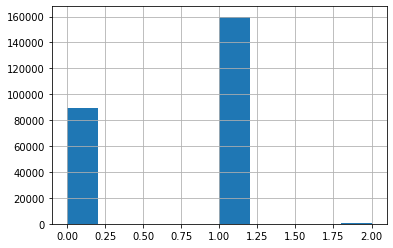

In [37]:
df['disposition'].hist()

In [38]:
#Make paid in full also as compliant
df.loc[df['payment_status'] == 'PAID IN FULL', 'compliance'] = 1

In [39]:
df['payment_status'].value_counts()

NO PAYMENT APPLIED         209183
PAID IN FULL                31931
PARTIAL PAYMENT APPLIED      9182
Name: payment_status, dtype: int64

In [40]:
# Need to encode the text values as numbers as well
df['payment_status'].replace(['NO PAYMENT APPLIED', 'PAID IN FULL', 'PARTIAL PAYMENT APPLIED'], [0, 1, 2], inplace=True)
df['payment_status'].value_counts()


0    209183
1     31931
2      9182
Name: payment_status, dtype: int64

In [41]:
df.head(3)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,NaT,1,250.0,25.0,305.0,305.0,0,0.0
1,27586,Detroit,NaT,1,750.0,75.0,855.0,75.0,1,1.0
2,22062,Detroit,NaT,0,250.0,0.0,0.0,0.0,0,NaN


In [42]:
df['city'].value_counts()

Detroit             154490
Southfield           14760
DEARBORN              4667
FARMINGTON HILLS      2329
OAK PARK              2216
                     ...  
DEARBORN HT              1
SLIVERWOOD               1
FARINGTON HILLS          1
BRADFORD                 1
SHERVEPORT               1
Name: city, Length: 5144, dtype: int64

In [43]:
df = df.groupby('city').filter(lambda x : len(x) > 300)

In [44]:
#df['city'].value_counts()
counts = df.city.value_counts()
counts.to_csv('city100plus.csv')

In [45]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["city_code"] = ord_enc.fit_transform(df[["city"]])
df[["city", "city_code"]].head(11)

,city,city_code
0,CHICAGO,5.0
1,Detroit,8.0
2,Detroit,8.0
3,Detroit,8.0
4,Detroit,8.0
7,Detroit,8.0
8,Detroit,8.0
9,Detroit,8.0
10,Detroit,8.0
12,Detroit,8.0


In [ ]:
df['city_code'].value_counts()

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Feature selection is very interesting phase here where by own intuition I have to select the features
#which might give best fit for data at hand

feature_names_tickets = ['ticket_id', 'disposition', 'fine_amount', 'city_code']
X_tickets = df[feature_names_tickets]
#Our target variable is compliance i.e., ticket chances of getting PAID
y_tickets = df['compliance']
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, random_state = 0)

In [52]:
clf = LogisticRegression(C=100).fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').